# Problem Statement:

The objective is to automate the loan eligibility process based on customer details. We have a dataset that includes information such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more.

## Step1:
**load the loan.csv file from data folder as a pandas dataframe and visualize the first 5 rows of the dataframe.**

In [20]:
import pandas as pd

# you must complete this function to load the data
def load_data(address):
    df = pd.read_csv('loan.csv')
    return df

df = load_data('data/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step2: 
**Explore the data**

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Complete the following function to create a histogram for each of the numerical features.

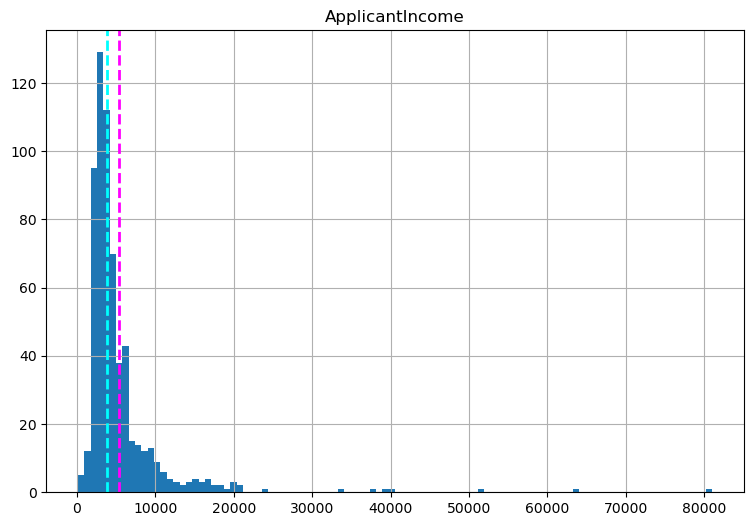

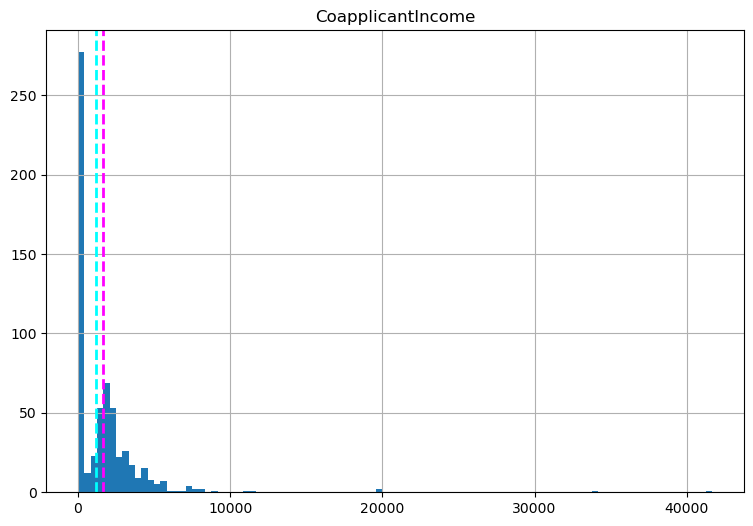

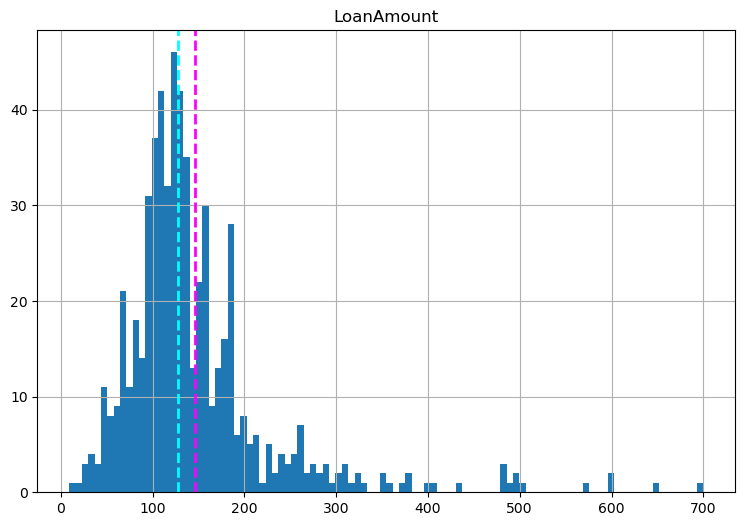

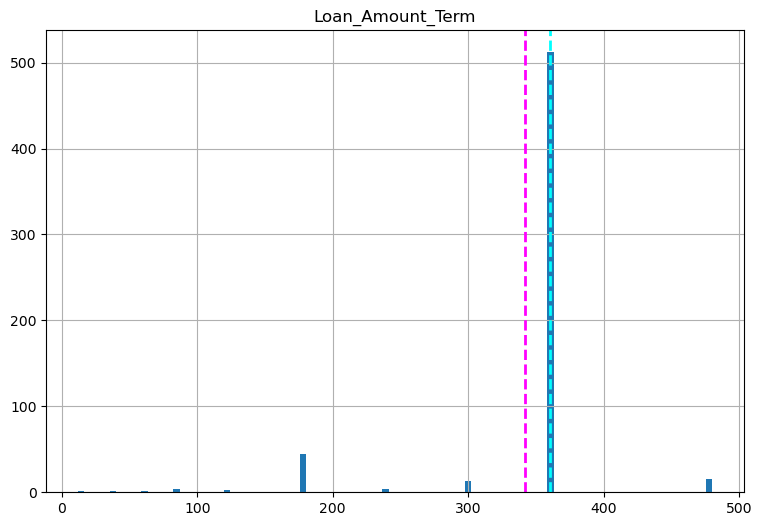

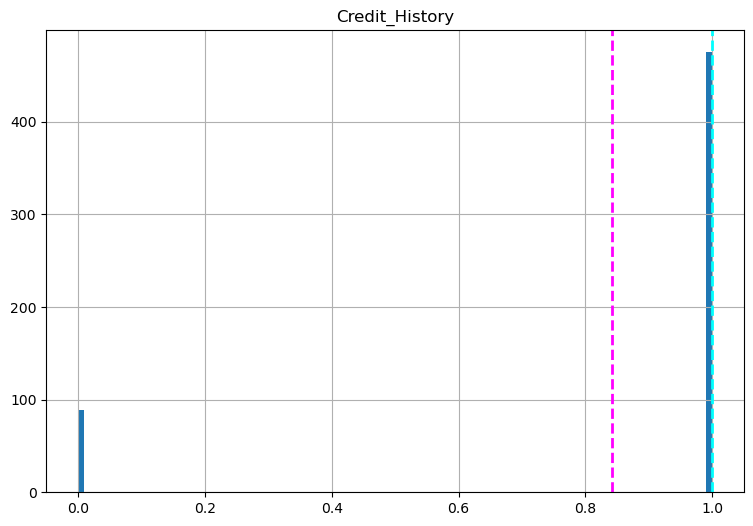

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(df, col):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_features:
    plot_histogram(df, col)
plt.show()

Now complete the following function to compare the distribution of samples per label for each feature by plotting a boxplot.

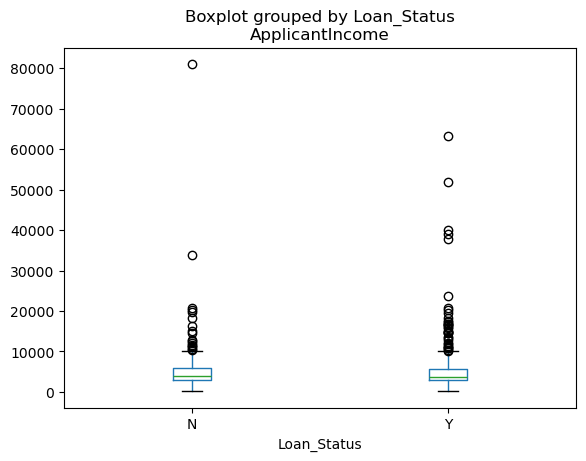

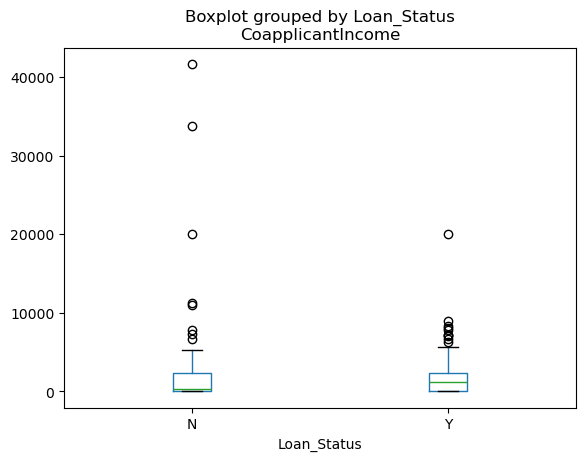

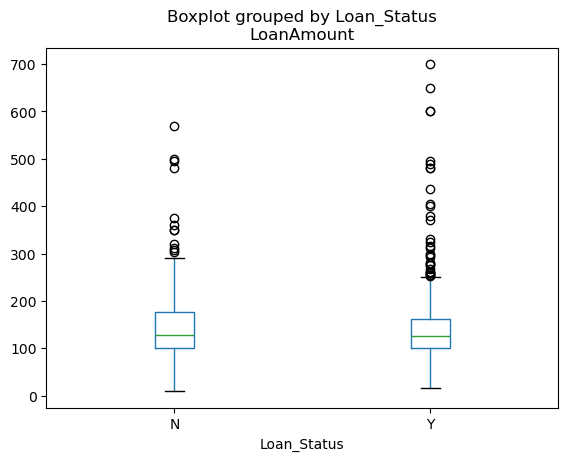

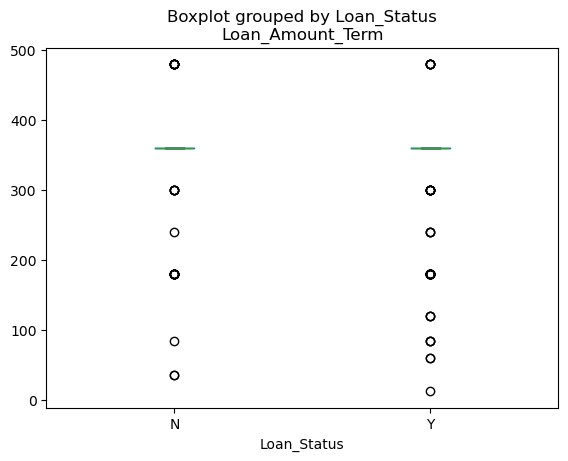

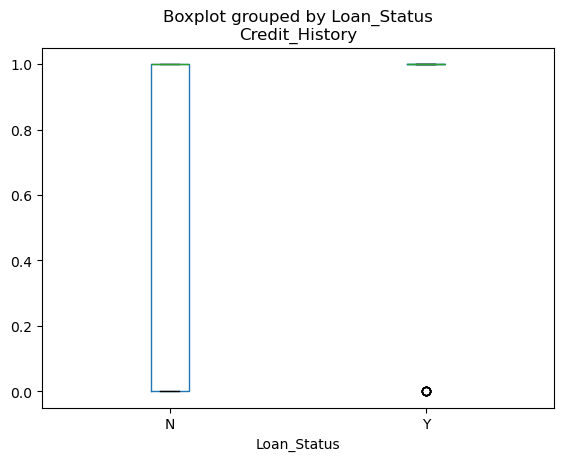

In [23]:
def plot_boxplot(df, col):
    #Complete this part#
    df.boxplot(by = 'Loan_Status', column =[col], grid = False) 
    plt.title(col)

for col in numeric_features:
    plot_boxplot(df, col)

Now Complete the function below, to plot a bar chart showing the count of samples of discrete features.

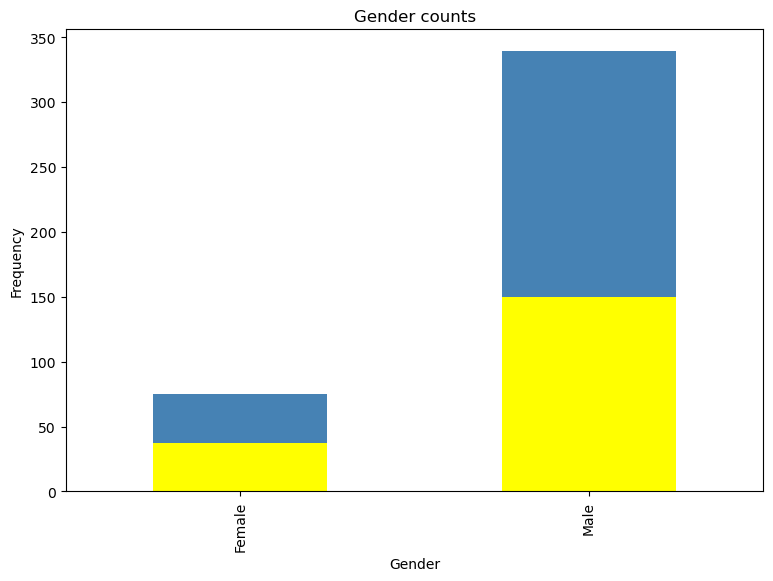

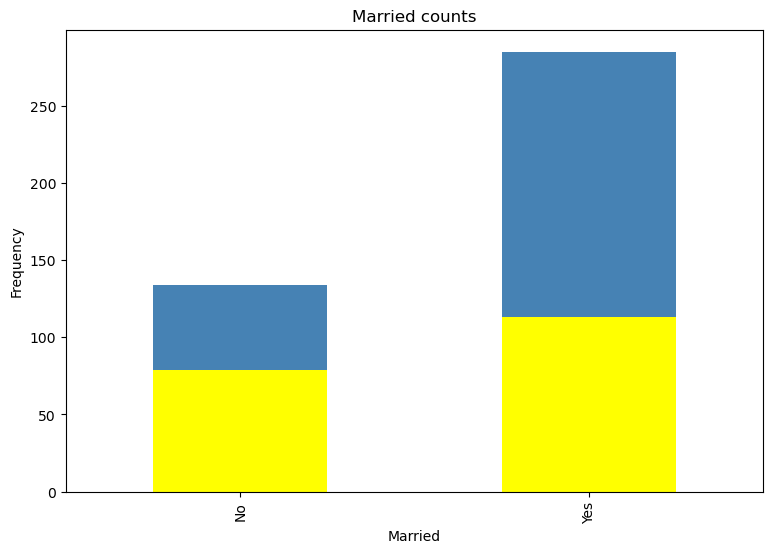

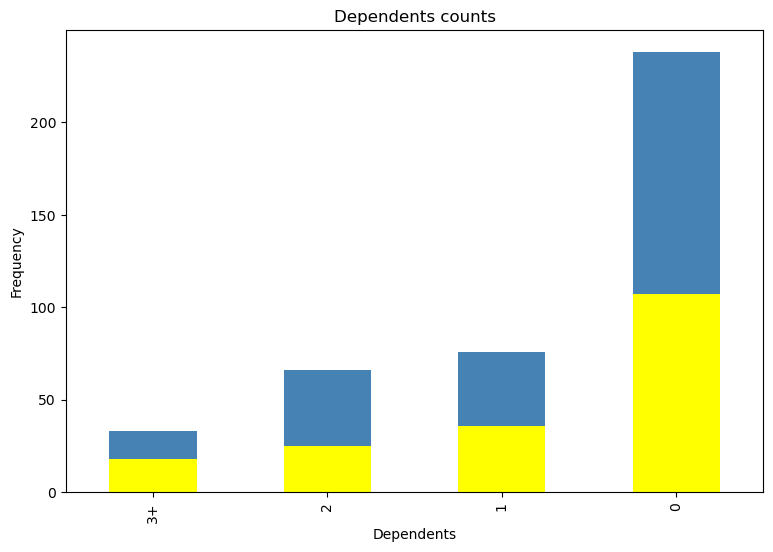

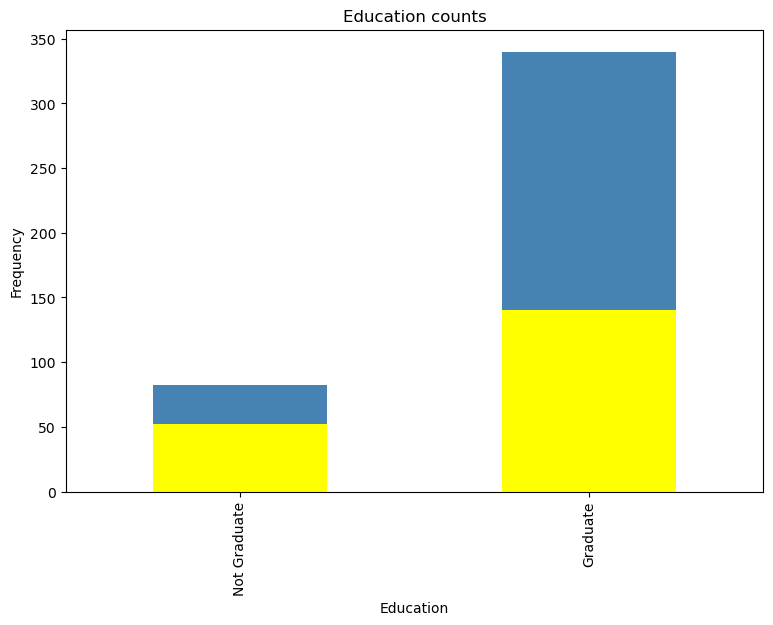

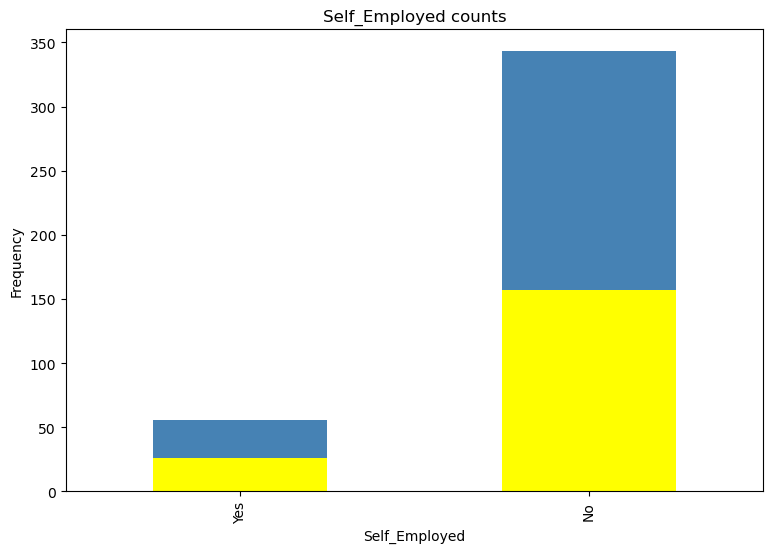

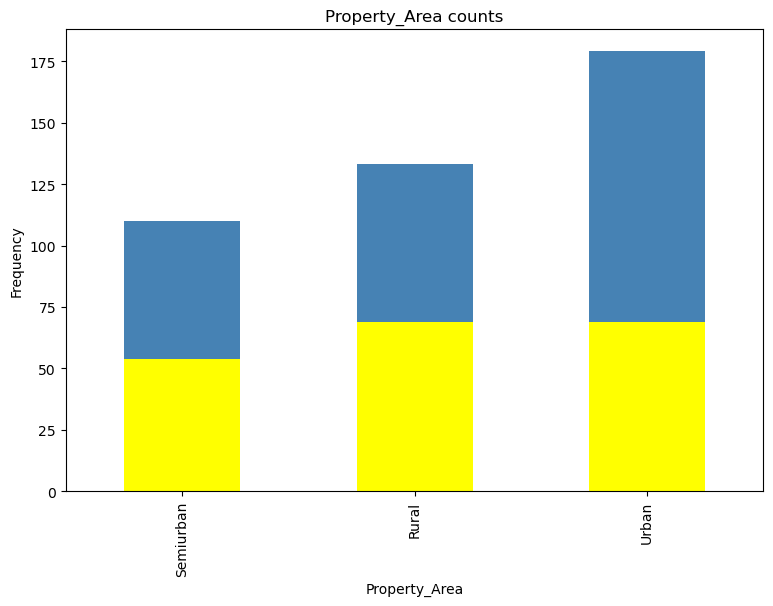

In [24]:
def plot_barchart(df, col):
    approved_counts = df[df['Loan_Status'].str.contains('Y')][col].value_counts().sort_values()
    denied_counts =df[df['Loan_Status'].str.contains('N')][col].value_counts().sort_values()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    approved_counts.plot.bar(ax = ax, color='steelblue')
    denied_counts.plot.bar(ax = ax, color='yellow')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_features:
    plot_barchart(df, col)

---
**Question:**
- **Can you share any interesting insights or observations you made during this visualization process? Consider aspects such as feature distributions, class separation, potential outliers, or any other patterns you noticed. How might these insights inform your approach to modeling or preprocessing in the next steps?"**

**Write your answer here**

---

## Step3:
**Handling missing values**

In [25]:
def count_the_missing_values_of_each_column(df):
    missing_values_series = df.isnull().sum()
    return missing_values_series
    
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**Complete the following functions to fill the missing values based on KNN**

**Part1**:

Since KNN could only handle numercal values, we should first transform the categorical variables into numerical ones:

In [26]:
from sklearn.preprocessing import OrdinalEncoder

def generate_the_df_with_categorical_features_encoded(df, cols):
    ordinal_encoder = OrdinalEncoder()
    df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df[cols].values), columns=cols)
    df[cols] = df_encoded
    return df
    
categorical_features_with_missing_valuse = ['Gender', 'Married', 'Dependents', 'Self_Employed']

df = generate_the_df_with_categorical_features_encoded(df, categorical_features_with_missing_valuse)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1.0,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0.0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0.0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0.0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


**part2**: 

Now that we've transformed the data lets use KNN to impute the missing values:

In [36]:
from sklearn.impute import KNNImputer
import numpy as np

def impute_the_Gender_missing_values(df):  
    knn_imputer = KNNImputer(n_neighbors=3)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = pd.DataFrame(knn_imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)
    return df

df = impute_the_Gender_missing_values(df)

In [37]:
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,Graduate,0.0,5849.0,0.0,138.0,360.0,1.0,Urban,1.0
1,LP001003,1.0,1.0,1.0,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,1.0,1.0,0.0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,1.0,1.0,0.0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,1.0,0.0,0.0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,1.0


## Step4:

**Preparing data for prediction**

Now complete the following function to separate features from labels and then split the training set from testing set with test_size being 30% of the data and set the random_state to be zero

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status']) 
    # Separate features from label
    X, y = df[features], df[label]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test
    
features = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
            'Property_Area']
label = 'Loan_Status'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 429
Test cases: 185


## Step5:

**Lets begin by training a KNN model**

First complete the following function to generate a pipeline:

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

def generate_knn_pipeline(df, ordinal_categorical_feature, onehot_categorical_feature, numerical_features):
    # Define categorical and numerical features
    c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_feature]
    c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_feature]
    n_idx = [df.columns.get_loc(item) for item in numerical_features]
    
    # Create transformers for numerical and categorical features
    ordinal_categorical_transformer = Pipeline(steps=[ ('ordinal', OrdinalEncoder(handle_unknown='error'))])

    onehot_categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    # Apply transformers to features using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat1', ordinal_categorical_transformer, c1_idx),
            ('cat2', onehot_categorical_transformer, c2_idx),
            ('num', numerical_transformer, n_idx),
        ])
    
    # Define the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', knn_model)
    ])

    return pipeline

ordinal_categorical_feature = ['Education']
onehot_categorical_feature = ['Property_Area']
numerical_features = df.columns.difference(ordinal_categorical_feature + onehot_categorical_feature + ['Loan_Status'])

pipeline = generate_knn_pipeline(df, ordinal_categorical_feature, onehot_categorical_feature, numerical_features)

---
**Question:**
- **We have employed both the Ordinal encoder and the OneHot encoder in this exercise for encoding different categorical features. Can you provide a rationale for the choice of encoder for each feature? In other words, why did we choose to use the Ordinal encoder for certain features and the OneHot encoder for others? What considerations or characteristics of the features have influenced our decision in selecting the appropriate encoder for each case?**

**Write your answer here**

---

Now complete the following snippet to make prediction and evaluate the results:

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

ValueError: could not convert string to float: 'LP002140'

## Step6: 
**Lets make the pipeline comprehensive and include the missing value imputation in the pipeline**

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

df = load_data('data/loan.csv')

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)

# Define categorical and numerical features
ordinal_categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']
c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_features]
onehot_categorical_features = ['Property_Area']
c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_features]
numerical_features = df.columns.difference(ordinal_categorical_features + onehot_categorical_features + ['Loan_Status'])
n_idx = [df.columns.get_loc(item) for item in numerical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='error'))
])

onehot_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

column_imputer = Pipeline(steps=[
    ('imputer0', KNNImputer())
])

# Apply transformers to features using ColumnTransformer
feature_transformer = ColumnTransformer(
    transformers=[
        ('cat1', ordinal_categorical_transformer, c1_idx),
        ('cat2', onehot_categorical_transformer, c2_idx),
        ('num', numerical_transformer, n_idx),
    ])

missing_value_imputer = ColumnTransformer(
    transformers=[
        ('imputer', column_imputer, c1_idx + c2_idx + n_idx)
    ])

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Create the pipeline
pipeline = Pipeline(steps=[
        ('preprocessor', feature_transformer),
        ("impute",missing_value_imputer),
        ('classifier', knn_model)
    ])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('impute',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 25  26]
 [ 15 119]] 

Accuracy: 0.7783783783783784
Overall Precision: 0.8206896551724138
Overall Recall: 0.8880597014925373


## Step7: 
**Lets try other classifiers in the pipeline**

Complete the following snippet to replace the KNN model with Naive Bayse model

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pipeline.set_params(classifier=gnb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('impute',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('classifier', GaussianNB())])

In [100]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 22  29]
 [  5 129]] 

Accuracy: 0.8162162162162162
Overall Precision: 0.8164556962025317
Overall Recall: 0.9626865671641791


Complete the following snippet to replace the Naive Bayse model with SVM

In [101]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma=10)
pipeline.set_params(classifier=svc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('impute',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('classifier', SVC(gamma=10, kernel='linear'))])

In [102]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 21  30]
 [  2 132]] 

Accuracy: 0.827027027027027
Overall Precision: 0.8148148148148148
Overall Recall: 0.9850746268656716


---
**Question:**
- **Among the various classification models implemented in this exercise, which one demonstrates superior performance in terms of the evaluation metrics such as accuracy, precision, and recall? Provide a detailed interpretation of the metrics and explain why you consider one model to be more effective than others in addressing the classification task. Consider aspects such as the balance between precision and recall, and any specific characteristics of the dataset that might influence your choice of the most effective model.**

**Write your answer here**

---

## Step 8:
**Considering the classification models covered in this lesson, implement a model to identify the single feature that provides the best separation for the classification task. Report the evaluation metrics of the model, including accuracy. Additionally, specify which feature is determined to be the most effective for classification.**

In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

import pandas as pd




def load_data(address):
    df = pd.read_csv('loan.csv')
    df= df.loc[:, df.columns != 'Loan_ID']
    return df

df = load_data('data/loan.csv')

def separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0):
    label_encoder = LabelEncoder()
    df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status']) 
    X, y = df[features], df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test
    
features = ['Gender','Married','Dependents','Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
            'Property_Area']
label = 'Loan_Status'


X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)



ordinal_categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']
c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_features]
onehot_categorical_features = ['Property_Area']
c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_features]
numerical_features = df.columns.difference(ordinal_categorical_features + onehot_categorical_features + ['Loan_Status'])
n_idx = [df.columns.get_loc(item) for item in numerical_features]


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='error'))
])

onehot_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error'))
])

column_imputer = Pipeline(steps=[
    ('imputer0', KNNImputer())
])



feature_transformer = ColumnTransformer(
    transformers=[
        ('cat1', ordinal_categorical_transformer, c1_idx),
        ('cat2', onehot_categorical_transformer, c2_idx),
        ('num', numerical_transformer, n_idx),
    ])

missing_value_imputer = ColumnTransformer(
    transformers=[
        ('imputer', column_imputer, c1_idx + c2_idx + n_idx)
    ])


gnb = GaussianNB()

pipeline = Pipeline(steps=[
        ('preprocessor', feature_transformer),
        ("impute",missing_value_imputer),
        ('classifier', gnb)
    ])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 22  29]
 [  5 129]] 

Accuracy: 0.8162162162162162
Overall Precision: 0.8164556962025317
Overall Recall: 0.9626865671641791


**Write your answer here**

## Step 9:

**Revisit Step 2 in your analysis. Identify and implement one preprocessing technique covered in this course that has not been applied yet. Apply this technique to the best-performing model from Step 7 and report its impact on the evaluation metrics.**

*Hint: Think about data points that might significantly deviate from the overall pattern and explore techniques to identify and handle such instances. This step is often useful for improving model performance.*

In [104]:
scaler = MinMaxScaler()
feature_transformer = ColumnTransformer(
    transformers=[
        ('num', scaler,  n_idx),
        ('cat1', ordinal_categorical_transformer, c1_idx),
        ('cat2', onehot_categorical_transformer, c2_idx)
    ])

pipeline = Pipeline(steps=[
        ('preprocessor', feature_transformer),
        ("impute",missing_value_imputer),
        ('classifier', gnb)
    ])
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 23  28]
 [  5 129]] 

Accuracy: 0.8216216216216217
Overall Precision: 0.821656050955414
Overall Recall: 0.9626865671641791


**Write your answer here**

---

**Note:** The dataset used in this exercise has been adapted from the challenge hosted at [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/). As a next step, consider exploring a variety of machine learning models and experimenting with different hyperparameters for each model. Strive to enhance the evaluation metrics, fine-tune your models and visualize the predictions by adapting dimentionality reduction methods like PCA. Additionally, you are encouraged to submit your predictions to the mentioned challenge for a more comprehensive comparison.

For further professional development, consider documenting your work in this Jupyter notebook and upload it to your GitHub account. This practice not only showcases your skills but also serves as a valuable addition to your resume.

Wishing you the best of luck in your endeavors!

---
